In [2]:
%viz 

Usage: %viz [--view=<VIEW>] [--style=<STYLE>...] <NAME> [<NAME>...]

Visualize model elements of <NAME>(s). <NAME>s must be fully qualified.

<VIEW> is case insensitive and possible candidates are:
   DEFAULT		Automatically choose an appropriate view from the given model element names
   TREE			Show a tree-structural view, like a Block Definition Diagram (BDD)
   INTERCONNECTION	Show an interconnection view, like an Internal Block Diagram (IBD)
   STATE		Show state machines
   ACTION		Show actions like an activity diagram
   SEQUENCE		Show events and messages in a sequence diagram
   MIXED		Show multiple views

<STYLE> is also case insensitive. Multiple --style options are allowed.  The possible style names are:
  DEFAULT		Standard B&&W
  STDCOLOR		Standard style with colors
  PLANTUML		PlantUML Style
  TB			Top-to-Bottom orientation
  LR			Left-to-Right orientation
  POLYLINE		Polyline style
  ORTHOLINE		Orthogonal line style
  SHOWLIB		Show elements of the standard libraries
  SHOWIN

In [10]:
package CubeSat_Base{
    public import SI::*;
    public import ISQ::*;
    public import ScalarValues::*;
    public import ShapeItems::*;
    public import SpatialItems::*;
    public import RealFunctions::*;
    // private import MeasurementReferences::CoordinateFrame;
    public import MeasurementReferences::TranslationRotationSequence;
    public import MeasurementReferences::Translation;
    public import MeasurementReferences::Rotation;

    abstract part def BaseComponent{
        attribute sysType : SystemType;
        attribute mass : ISQ::MassValue;
        attribute massError : ISQ::MassValue;
    }

    part def Building :> BaseComponent{
        attribute location : String;
        attribute latitude : AngularMeasureValue;
        attribute longitude : AngularMeasureValue;
    }

    part def EntityComponent :> BaseComponent, SpatialItem{
        attribute tempRange : Range{
            :>> upper : ISQ::ThermodynamicTemperatureValue;
            :>> lower : ISQ::ThermodynamicTemperatureValue;
        }
        attribute material : Material[1..*];
        attribute price : Natural;
        attribute vendor : String[1..*];
        attribute geometricCenter : CartesianPosition3dVector;
        attribute gravityCenter : CartesianPosition3dVector;
    }

    part def FunctionComponent :> EntityComponent{
        attribute mode;
        attribute powerConsumption {
            attribute typical : ISQ::PowerValue;
            attribute peak : ISQ::PowerValue;
        }
        port powerEnd : PowerEnd [0..*];
        port dataEnd : DataEnd [0..*];
    }

    abstract port def PortComponent :> BaseComponent;
    port def PowerEnd :> PortComponent;
    port def DataEnd :> PortComponent{
        attribute BAUDRate : Natural;
        attribute dataWidth : ISQ::StorageCapacityValue;
        attribute parityBit : Boolean;
        attribute STARTBit : ISQ::StorageCapacityValue;
        attribute STOPBit : ISQ::StorageCapacityValue;
    }
    interface def DataLine{
        end port a : DataEnd;
        end port b : DataEnd;
    }
    interface def BUS :> DataLine;

    part def CubeSatEntity :> FunctionComponent{
        part sys : BaseComponent [1];
        part ss : EntityComponent [1..*];
        part pay : FunctionComponent [0..*];
        part adcs : FunctionComponent [1..*];
        part eps : FunctionComponent [1..*];
        part obdh : FunctionComponent [1..*];
        part comm : FunctionComponent [1..*];
        part tcs : FunctionComponent [0..*];
        part dep : FunctionComponent [0..1];
        part prop : FunctionComponent [0..*];
        part gs : FunctionComponent [0..*];
        part others : FunctionComponent [0..*]; 
    }

    enum def CurrentType{
        enum DC;
        enum AC;
    }

    item def ElectricPower{
        attribute current : ElectricCurrentValue;
        attribute voltage : SourceVoltageValue;
        attribute type : CurrentType;
    }
    
    attribute def Range{
        attribute upper;
        attribute lower;
    }
    attribute def Material{
        attribute name : String;
        attribute mechanicalProperty{
            attribute youngsModule : ISQ::ModulusOfElasticityValue;
            attribute yieldStress : ISQ::NormalStressValue;
            attribute ultimateStrength : ISQ::NormalStressValue;
        }
    }

    enum def InterfaceType{
        enum I2C;
        enum SPI;
    }
    
    enum def SystemType{
        enum SYS;    // 总体
        enum SS;     // 结构
        enum PAY;    // 载荷
        enum ADCS;   // 姿控
        enum EPS;    // 供电
        enum OBDH;   // 星务
        enum COMM;   // 通信
        enum TCS;    // 热控
        enum DEP;    // 部署
        enum PROP;   // 推进
        enum GS;     // 地面站
        enum OTHERS; // 其他
    }

    enum def WaveBand{
        enum UHF;
        enum VHF;
        enum X;
    }

    attribute PI = 3.1415927;
    attribute GravitationalConstant = 3.986e14['m³'*'s⁻²'];
    attribute EarthRadius = 6378.0[km];
    attribute SolarConstantGsun = 1412[W/m];
    attribute EarthIRConstantGearth = 217[W/m];
    attribute AlbedoRatio = 0.3;
    attribute DeepSpaceTemperatureTspace= 2.7[K];

}

Package CubeSat_Base (ab850f4e-bfd9-4515-a196-a89b9d1a6291)


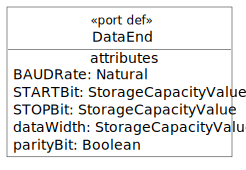

In [36]:
%viz CubeSat_Base::DataEnd